In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as scs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer

In [2]:
df = pd.read_csv('data_correlation_gone.csv',index_col = 0)

In [3]:
check_col = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','distance_from_a_city']

In [4]:
def remove_outliers(df, col, threshold = 3):
    zscores = scs.zscore(df[col])
    indices = np.abs(np.where(zscores > threshold))
    return indices[0]


all_indices = []
for col in check_col:
    indices = remove_outliers(df, col, threshold = 3)
    all_indices.extend(indices)
all_indices = np.unique(all_indices)

In [7]:
df.reset_index(drop=True,inplace=True)

In [8]:
df.drop(all_indices,axis=0,inplace= True)

In [9]:
df.reset_index(drop=True,inplace=True)

In [10]:
df['sqft_lot'].mean()

10667.345836994728

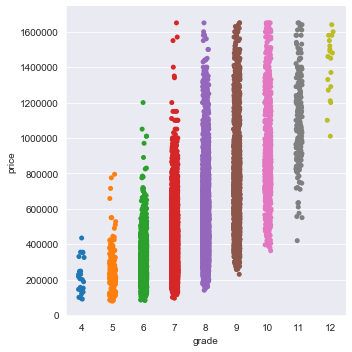

In [11]:
sns.catplot(x='grade',y='price',data=df,orient='v')

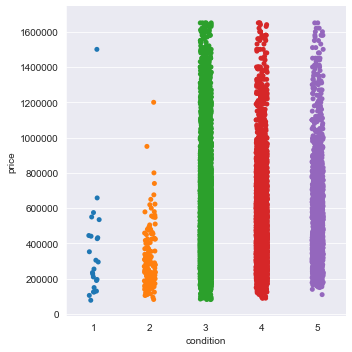

In [12]:
sns.catplot(x='condition',y='price',data=df,orient='v')

In [283]:
df = df.round({'bathrooms':0})

In [23]:
df['grade4'] = df.grade.apply(lambda x: 1 if x ==4 else 0)
df['grade5'] = df.grade.apply(lambda x: 1 if x ==5 else 0)
df['grade6'] = df.grade.apply(lambda x: 1 if x ==6 else 0)
df['grade7'] = df.grade.apply(lambda x: 1 if x ==7 else 0)
df['grade8'] = df.grade.apply(lambda x: 1 if x ==8 else 0)
df['grade9'] = df.grade.apply(lambda x: 1 if x ==9 else 0)
df['grade10'] = df.grade.apply(lambda x: 1 if x ==10 else 0)
df['grade11'] = df.grade.apply(lambda x: 1 if x ==11 else 0)


In [24]:
df['grade10'].value_counts()

0    18208
Name: grade10, dtype: int64

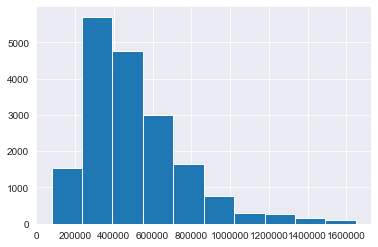

In [25]:
df['price'].hist()

In [26]:
def norm_feat(series):
    return (series - series.mean())/series.std()

In [27]:
norm = ['bedrooms','bathrooms','sqft_living','sqft_lot','distance_from_a_city','Age_of_House',
           'Years_last_renovation','grade']


In [28]:
for feat in norm:
    df[feat] = norm_feat(df[feat])


In [29]:
# tomodel = ['distance_from_a_city','Years_last_renovation','sqft_living']

In [30]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'zipcode',
       'Age_of_House', 'Years_last_renovation', 'basement', 'biggerliving',
       'biggerlot', 'distance_from_a_city', 'distance_from_airport', 'grade4',
       'grade5', 'grade6', 'grade7', 'grade8', 'grade9', 'grade10', 'grade11'],
      dtype='object')

In [31]:
# x_cols = ['bedrooms','bathrooms','sqft_living','sqft_lot','distance_from_a_city',
#            'Age_of_House','basement','bedbath','grade']
# outcome = ['price']

In [38]:
x_cols = ['bedrooms','bathrooms','sqft_living','sqft_lot','distance_from_a_city','Years_last_renovation',
           'basement']
outcome = ['price']

In [39]:
X = df[x_cols]
y = df['price']

In [40]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.440
Model:                            OLS   Adj. R-squared (uncentered):              0.440
Method:                 Least Squares   F-statistic:                              2046.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                        0.00
Time:                        15:20:57   Log-Likelihood:                     -2.6170e+05
No. Observations:               18208   AIC:                                  5.234e+05
Df Residuals:                   18201   BIC:                                  5.235e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
bedrooms              -3.511e+04   4023.126     -8.728      0.000    -4.3e+04   -2.72e+04
bathrooms             -2.227e+04   5268.876     -4.227      0.000   -3.26e+04   -1.19e+04
sqft_living             1.33e+05   5157.299     25.781      0.000    1.23e+05    1.43e+05
sqft_lot               2.396e+04   3363.501      7.124      0.000    1.74e+04    3.06e+04
distance_from_a_city  -8.068e+04   3433.543    -23.497      0.000   -8.74e+04   -7.39e+04
Years_last_renovation -5.164e+04   4099.531    -12.597      0.000   -5.97e+04   -4.36e+04
basement               5.269e+05   5276.499     99.862      0.000    5.17e+05    5.37e+05
==============================================================================
Omnibus:                      176.352   Durbin-Watson:                   0.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.702
Skew:                          -0.157   Prob(JB):                     8.45e-33
Kurtosis:                       2.691   Cond. No.                         3.41
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

7 7
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'distance_from_a_city']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
bedrooms,-3.511e+04,4023.126,-8.728,0.0,-4.3e+04,-2.72e+04
bathrooms,-2.227e+04,5268.876,-4.227,0.0,-3.26e+04,-1.19e+04
sqft_living,1.33e+05,5157.299,25.781,0.0,1.23e+05,1.43e+05
sqft_lot,2.396e+04,3363.501,7.124,0.0,1.74e+04,3.06e+04
distance_from_a_city,-8.068e+04,3433.543,-23.497,0.0,-8.74e+04,-7.39e+04


In [42]:
X = df[x_cols]
y= df['price']

In [43]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.440
Model:                            OLS   Adj. R-squared (uncentered):              0.440
Method:                 Least Squares   F-statistic:                              2046.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                        0.00
Time:                        15:26:16   Log-Likelihood:                     -2.6170e+05
No. Observations:               18208   AIC:                                  5.234e+05
Df Residuals:                   18201   BIC:                                  5.235e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
bedrooms              -3.511e+04   4023.126     -8.728      0.000    -4.3e+04   -2.72e+04
bathrooms             -2.227e+04   5268.876     -4.227      0.000   -3.26e+04   -1.19e+04
sqft_living             1.33e+05   5157.299     25.781      0.000    1.23e+05    1.43e+05
sqft_lot               2.396e+04   3363.501      7.124      0.000    1.74e+04    3.06e+04
distance_from_a_city  -8.068e+04   3433.543    -23.497      0.000   -8.74e+04   -7.39e+04
Years_last_renovation -5.164e+04   4099.531    -12.597      0.000   -5.97e+04   -4.36e+04
basement               5.269e+05   5276.499     99.862      0.000    5.17e+05    5.37e+05
==============================================================================
Omnibus:                      176.352   Durbin-Watson:                   0.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.702
Skew:                          -0.157   Prob(JB):                     8.45e-33
Kurtosis:                       2.691   Cond. No.                         3.41
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
# Your code here - Code a way to identify multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[x_cols]
vif = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
list(zip(x_cols,vif))

[('bedrooms', 1.650668956766038),
 ('bathrooms', 2.8311881581495277),
 ('sqft_living', 2.712547471656193),
 ('sqft_lot', 1.1537607586998795),
 ('distance_from_a_city', 1.2023133495734502),
 ('Years_last_renovation', 1.7139614711327322),
 ('basement', 1.085102014883084)]

In [582]:
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))

15 15


In [583]:
X = df[x_cols]
y= df['price']
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.877
Model:                            OLS   Adj. R-squared (uncentered):              0.877
Method:                 Least Squares   F-statistic:                              9140.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                        0.00
Time:                        14:46:45   Log-Likelihood:                     -2.6460e+05
No. Observations:               19221   AIC:                                  5.292e+05
Df Residuals:                   19206   BIC:                                  5.294e+05
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
bedrooms              -5.151e+04   2132.786    -24.150      0.000   -5.57e+04   -4.73e+04
bathrooms              3.565e+04   2966.344     12.018      0.000    2.98e+04    4.15e+04
sqft_living            2.549e+05   3316.106     76.853      0.000    2.48e+05    2.61e+05
sqft_lot               9513.1476   1742.592      5.459      0.000    6097.516    1.29e+04
distance_from_a_city  -1.222e+05   1868.533    -65.403      0.000   -1.26e+05   -1.19e+05
Years_last_renovation  4.364e+04   2268.360     19.240      0.000    3.92e+04    4.81e+04
basement              -2.123e+04   3765.510     -5.637      0.000   -2.86e+04   -1.38e+04
grade4                 5.407e+05   4.64e+04     11.662      0.000     4.5e+05    6.32e+05
grade5                 5.397e+05   1.64e+04     32.929      0.000    5.08e+05    5.72e+05
grade6                 5.167e+05   6411.404     80.595      0.000    5.04e+05    5.29e+05
grade7                 5.265e+05   3407.157    154.536      0.000     5.2e+05    5.33e+05
grade8                 5.307e+05   3602.894    147.308      0.000    5.24e+05    5.38e+05
grade9                  5.77e+05   5418.377    106.491      0.000    5.66e+05    5.88e+05
grade10                6.668e+05   8358.781     79.778      0.000     6.5e+05    6.83e+05
grade11                8.081e+05   1.39e+04     58.313      0.000    7.81e+05    8.35e+05
==============================================================================
Omnibus:                    18574.521   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2293760.182
Skew:                           4.370   Prob(JB):                         0.00
Kurtosis:                      55.799   Cond. No.                         44.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [584]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.877
Model:                            OLS   Adj. R-squared (uncentered):              0.877
Method:                 Least Squares   F-statistic:                              9140.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                        0.00
Time:                        14:46:46   Log-Likelihood:                     -2.6460e+05
No. Observations:               19221   AIC:                                  5.292e+05
Df Residuals:                   19206   BIC:                                  5.294e+05
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
bedrooms              -5.151e+04   2132.786    -24.150      0.000   -5.57e+04   -4.73e+04
bathrooms              3.565e+04   2966.344     12.018      0.000    2.98e+04    4.15e+04
sqft_living            2.549e+05   3316.106     76.853      0.000    2.48e+05    2.61e+05
sqft_lot               9513.1476   1742.592      5.459      0.000    6097.516    1.29e+04
distance_from_a_city  -1.222e+05   1868.533    -65.403      0.000   -1.26e+05   -1.19e+05
Years_last_renovation  4.364e+04   2268.360     19.240      0.000    3.92e+04    4.81e+04
basement              -2.123e+04   3765.510     -5.637      0.000   -2.86e+04   -1.38e+04
grade4                 5.407e+05   4.64e+04     11.662      0.000     4.5e+05    6.32e+05
grade5                 5.397e+05   1.64e+04     32.929      0.000    5.08e+05    5.72e+05
grade6                 5.167e+05   6411.404     80.595      0.000    5.04e+05    5.29e+05
grade7                 5.265e+05   3407.157    154.536      0.000     5.2e+05    5.33e+05
grade8                 5.307e+05   3602.894    147.308      0.000    5.24e+05    5.38e+05
grade9                  5.77e+05   5418.377    106.491      0.000    5.66e+05    5.88e+05
grade10                6.668e+05   8358.781     79.778      0.000     6.5e+05    6.83e+05
grade11                8.081e+05   1.39e+04     58.313      0.000    7.81e+05    8.35e+05
==============================================================================
Omnibus:                    18574.521   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2293760.182
Skew:                           4.370   Prob(JB):                         0.00
Kurtosis:                      55.799   Cond. No.                         44.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

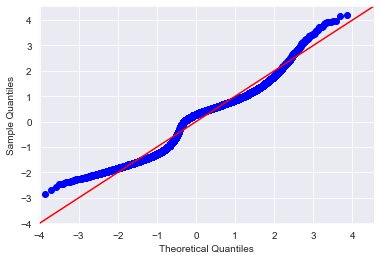

In [45]:
fig = sm.graphics.qqplot(model.resid, dist=scs.norm, line='45', fit=True)


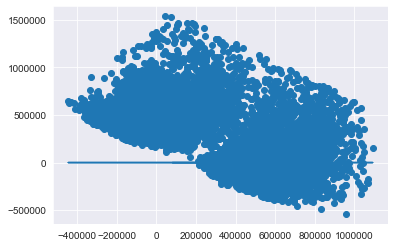

In [46]:
plt.scatter(model.predict(X), model.resid)
plt.plot(model.predict(X), [0 for i in range(len(df))])

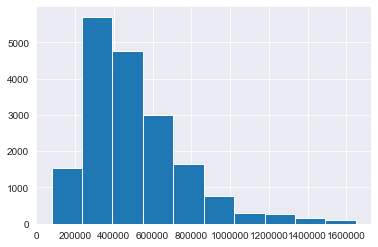

In [47]:
df.price.hist()

In [51]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df.price.quantile(q=q)))

0.8 percentile: 675960.0
0.81 percentile: 690000.0
0.82 percentile: 700000.0
0.83 percentile: 716000.0
0.84 percentile: 730000.0
0.85 percentile: 746474.9999999995
0.86 percentile: 760000.0
0.87 percentile: 775000.0
0.88 percentile: 795000.0
0.89 percentile: 810229.9999999997
0.9 percentile: 834000.0
0.91 percentile: 855000.0
0.92 percentile: 880000.0
0.93 percentile: 911559.0000000019
0.94 percentile: 950000.0
0.95 percentile: 991629.9999999995
0.96 percentile: 1060000.0
0.97 percentile: 1160000.0
0.98 percentile: 1260000.0
0.99 percentile: 1400000.0


In [52]:
orig_tot = len(df)
df = df[df.price < 1100000.0] # Subsetting to remove extreme outliers
print('Percent removed:', (orig_tot -len(df))/orig_tot)


Percent removed: 0.036742091388400705


In [53]:
X = df[x_cols]
y = df['price']

In [54]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.404
Model:                            OLS   Adj. R-squared (uncentered):              0.403
Method:                 Least Squares   F-statistic:                              1695.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                        0.00
Time:                        15:27:05   Log-Likelihood:                     -2.5100e+05
No. Observations:               17539   AIC:                                  5.020e+05
Df Residuals:                   17532   BIC:                                  5.021e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
bedrooms              -2.079e+04   3890.351     -5.344      0.000   -2.84e+04   -1.32e+04
bathrooms             -3.191e+04   5094.149     -6.265      0.000   -4.19e+04   -2.19e+04
sqft_living            7.649e+04   5136.326     14.892      0.000    6.64e+04    8.66e+04
sqft_lot               2.253e+04   3244.054      6.944      0.000    1.62e+04    2.89e+04
distance_from_a_city  -5.837e+04   3275.770    -17.820      0.000   -6.48e+04    -5.2e+04
Years_last_renovation -6.479e+04   3977.447    -16.290      0.000   -7.26e+04    -5.7e+04
basement               5.083e+05   5056.826    100.526      0.000    4.98e+05    5.18e+05
==============================================================================
Omnibus:                      810.007   Durbin-Watson:                   0.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              459.508
Skew:                          -0.244   Prob(JB):                    1.66e-100
Kurtosis:                       2.376   Cond. No.                         3.40
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

7 7
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'distance_from_a_city']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
bedrooms,-2.079e+04,3890.351,-5.344,0.0,-2.84e+04,-1.32e+04
bathrooms,-3.191e+04,5094.149,-6.265,0.0,-4.19e+04,-2.19e+04
sqft_living,7.649e+04,5136.326,14.892,0.0,6.64e+04,8.66e+04
sqft_lot,2.253e+04,3244.054,6.944,0.0,1.62e+04,2.89e+04
distance_from_a_city,-5.837e+04,3275.770,-17.820,0.0,-6.48e+04,-5.2e+04


In [56]:
X = df[x_cols]
y= df['price']
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.404
Model:                            OLS   Adj. R-squared (uncentered):              0.403
Method:                 Least Squares   F-statistic:                              1695.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                        0.00
Time:                        15:27:07   Log-Likelihood:                     -2.5100e+05
No. Observations:               17539   AIC:                                  5.020e+05
Df Residuals:                   17532   BIC:                                  5.021e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
bedrooms              -2.079e+04   3890.351     -5.344      0.000   -2.84e+04   -1.32e+04
bathrooms             -3.191e+04   5094.149     -6.265      0.000   -4.19e+04   -2.19e+04
sqft_living            7.649e+04   5136.326     14.892      0.000    6.64e+04    8.66e+04
sqft_lot               2.253e+04   3244.054      6.944      0.000    1.62e+04    2.89e+04
distance_from_a_city  -5.837e+04   3275.770    -17.820      0.000   -6.48e+04    -5.2e+04
Years_last_renovation -6.479e+04   3977.447    -16.290      0.000   -7.26e+04    -5.7e+04
basement               5.083e+05   5056.826    100.526      0.000    4.98e+05    5.18e+05
==============================================================================
Omnibus:                      810.007   Durbin-Watson:                   0.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              459.508
Skew:                          -0.244   Prob(JB):                    1.66e-100
Kurtosis:                       2.376   Cond. No.                         3.40
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
# Your code here - Code a way to identify multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[x_cols]
vif = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
list(zip(x_cols,vif))

[('bedrooms', 1.6561838241409073),
 ('bathrooms', 2.750045533920491),
 ('sqft_living', 2.6222220976750092),
 ('sqft_lot', 1.1510293144479429),
 ('distance_from_a_city', 1.194628114092811),
 ('Years_last_renovation', 1.7432549231684369),
 ('basement', 1.0612135630064565)]

In [58]:
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 8]
print(len(vif_scores), len(x_cols))

7 7


In [59]:
X = df[x_cols]
y= df['price']
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.404
Model:                            OLS   Adj. R-squared (uncentered):              0.403
Method:                 Least Squares   F-statistic:                              1695.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                        0.00
Time:                        15:27:09   Log-Likelihood:                     -2.5100e+05
No. Observations:               17539   AIC:                                  5.020e+05
Df Residuals:                   17532   BIC:                                  5.021e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
bedrooms              -2.079e+04   3890.351     -5.344      0.000   -2.84e+04   -1.32e+04
bathrooms             -3.191e+04   5094.149     -6.265      0.000   -4.19e+04   -2.19e+04
sqft_living            7.649e+04   5136.326     14.892      0.000    6.64e+04    8.66e+04
sqft_lot               2.253e+04   3244.054      6.944      0.000    1.62e+04    2.89e+04
distance_from_a_city  -5.837e+04   3275.770    -17.820      0.000   -6.48e+04    -5.2e+04
Years_last_renovation -6.479e+04   3977.447    -16.290      0.000   -7.26e+04    -5.7e+04
basement               5.083e+05   5056.826    100.526      0.000    4.98e+05    5.18e+05
==============================================================================
Omnibus:                      810.007   Durbin-Watson:                   0.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              459.508
Skew:                          -0.244   Prob(JB):                    1.66e-100
Kurtosis:                       2.376   Cond. No.                         3.40
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

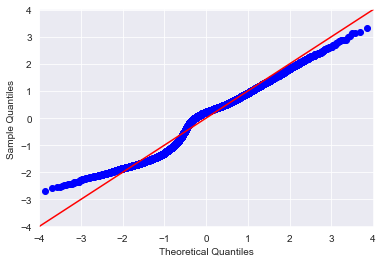

In [60]:
fig = sm.graphics.qqplot(model.resid, dist=scs.norm, line='45', fit=True)


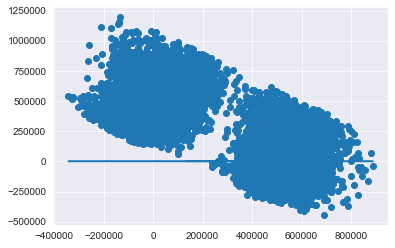

In [61]:
plt.scatter(model.predict(X), model.resid)
plt.plot(model.predict(X), [0 for i in range(len(df))])

0.8 percentile: 645000.0
0.81 percentile: 652355.0600000003
0.82 percentile: 665000.0
0.83 percentile: 675000.0
0.84 percentile: 690000.0
0.85 percentile: 700000.0
0.86 percentile: 715000.0
0.87 percentile: 726000.0
0.88 percentile: 740000.0
0.89 percentile: 754245.9999999999
0.9 percentile: 771000.0
0.91 percentile: 785116.0
0.92 percentile: 802539.3600000001
0.93 percentile: 825000.0
0.94 percentile: 848000.0
0.95 percentile: 869094.9999999986
0.96 percentile: 898000.0
0.97 percentile: 925000.0
0.98 percentile: 965000.0
0.99 percentile: 1010000.0


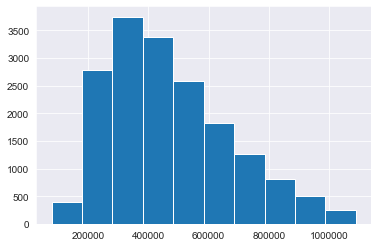

In [62]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df.price.quantile(q=q)))

df.price.hist()

In [600]:
df = df[df.price <= 800000.0]


In [601]:
X =df[x_cols]
y=df['price']
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.955
Model:                            OLS   Adj. R-squared (uncentered):              0.955
Method:                 Least Squares   F-statistic:                          2.347e+04
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                        0.00
Time:                        14:47:10   Log-Likelihood:                     -2.1441e+05
No. Observations:               16601   AIC:                                  4.289e+05
Df Residuals:                   16586   BIC:                                  4.290e+05
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
bedrooms              -1.005e+04   1022.145     -9.834      0.000   -1.21e+04   -8048.381
bathrooms              1.236e+04   1431.165      8.638      0.000    9557.017    1.52e+04
sqft_living            8.667e+04   1853.279     46.766      0.000     8.3e+04    9.03e+04
sqft_lot               2.001e+04    878.603     22.776      0.000    1.83e+04    2.17e+04
distance_from_a_city  -7.889e+04    847.338    -93.108      0.000   -8.06e+04   -7.72e+04
Years_last_renovation  2.504e+04   1098.008     22.809      0.000    2.29e+04    2.72e+04
basement              -1.148e+04   1741.325     -6.591      0.000   -1.49e+04   -8064.738
grade4                 3.378e+05   1.99e+04     17.017      0.000    2.99e+05    3.77e+05
grade5                 3.566e+05   7118.766     50.099      0.000    3.43e+05    3.71e+05
grade6                 3.711e+05   2942.606    126.121      0.000    3.65e+05    3.77e+05
grade7                 4.425e+05   1593.052    277.793      0.000    4.39e+05    4.46e+05
grade8                 5.065e+05   1639.438    308.956      0.000    5.03e+05     5.1e+05
grade9                  5.76e+05   2830.833    203.460      0.000     5.7e+05    5.82e+05
grade10                 6.06e+05   5746.830    105.458      0.000    5.95e+05    6.17e+05
grade11                 5.64e+05   2.34e+04     24.113      0.000    5.18e+05     6.1e+05
==============================================================================
Omnibus:                      282.561   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              360.266
Skew:                           0.240   Prob(JB):                     5.88e-79
Kurtosis:                       3.539   Cond. No.                         45.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

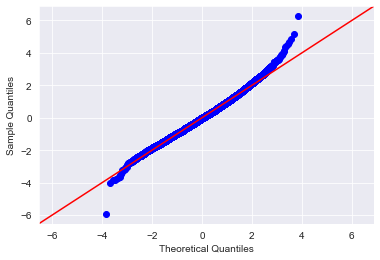

In [602]:
fig = sm.graphics.qqplot(model.resid, dist=scs.norm, line='45', fit=True)


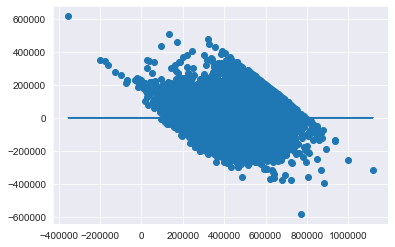

In [603]:
plt.scatter(model.predict(X), model.resid)
plt.plot(model.predict(X), [0 for i in range(len(df))])

In [48]:
def plot_residuals(resids):
    plt.hist(resids)
    plt.title("Residuals")
    plt.show()
    
    xspace = np.linspace(0, 1, len(resids))
    plt.scatter(xspace, resids)
    plt.title("resids")
    plt.hlines(0, xmin=0, xmax=1)
    plt.show()

In [49]:
residuals = model.resid

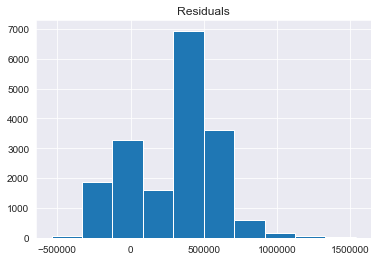

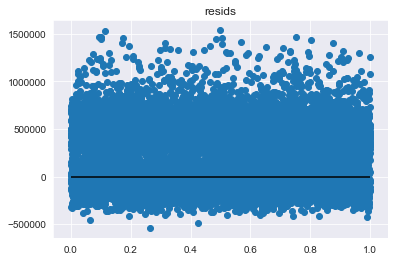

In [50]:
plot_residuals(residuals)

In [607]:
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

from sklearn.metrics import r2_score

In [608]:
ols = LinearRegression(fit_intercept=False, normalize=False, n_jobs=-1)

In [609]:
cv5_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=5, n_jobs=-1) )
cv10_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=10, n_jobs=-1) )
cv20_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=20, n_jobs=-1) )

# cv breaks your data into that many equal pieces 
cv5_scores,cv10_scores,cv20_scores

(0.6268759828794053, 0.6259686907181359, 0.6261098049239862)

In [610]:
cv5mae_scores = np.mean(cross_val_score(ols, X, y, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1) )
cv10mae_scores = np.mean(cross_val_score(ols, X, y, scoring='neg_mean_absolute_error', cv=10, n_jobs=-1) )
cv20mae_scores = np.mean(cross_val_score(ols, X, y, scoring='neg_mean_absolute_error', cv=20, n_jobs=-1) )

# cv breaks your data into that many equal pieces 
cv5mae_scores,cv10mae_scores,cv20mae_scores

(-77635.91400165868, -77616.8244615875, -77549.74088548894)

In [611]:
X_shuff, y_shuff = shuffle(X, y)
cv_scores = cross_val_score(ols, X_shuff, y_shuff, scoring='r2', cv=5, n_jobs=-1) 
cv_scores.mean()

0.628574768123823

In [612]:
def make_ols_sklearn(X, y, test_size=0.20, fit_intercept=False, standardize=False):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    if standardize:
        ss = StandardScaler()
        ss.fit(X_train)
        X_train = ss.transform(X_train)
        X_test = ss.transform(X_test)
    ols = LinearRegression(fit_intercept=fit_intercept, normalize=False)
    ols.fit(X_train, y_train)
    train_score = ols.score(X_train, y_train)
    test_score = ols.score(X_test, y_test)
    cv5_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=5, n_jobs=-1) )
    cv10_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=10, n_jobs=-1) )
    cvmse_5 = np.mean(cross_val_score(ols,X , y, cv=5, scoring='neg_mean_squared_error'))
    cvmse_10 = np.mean(cross_val_score(ols,X, y, cv=10, scoring='neg_mean_squared_error'))
    print(f"train R2 score = {train_score}")
    print(f"test R2 score = {test_score}")
    print(f"cv5 R2 score = {cv5_scores}")
    print(f"cv10 R2 score = {cv10_scores}")
    print(f"cv5 MSE score = {cvmse_5}")
    print(f"cv10  MSE score = {cvmse_10}")

    return ols

In [613]:
make_ols_sklearn(X, y)

train R2 score = 0.6333465647567129
test R2 score = 0.6161179496925959
cv5 R2 score = 0.6268759828794053
cv10 R2 score = 0.6259686907181359
cv5 MSE score = -9738382580.080162
cv10  MSE score = -9733873742.676697


LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [614]:
make_ols_sklearn(X, y)

train R2 score = 0.6318132095672329
test R2 score = 0.6221942886881865
cv5 R2 score = 0.6268759828794053
cv10 R2 score = 0.6259686907181359
cv5 MSE score = -9738382580.080162
cv10  MSE score = -9733873742.676697


LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [615]:
residuals = model.resid

In [616]:
resid = pd.DataFrame(df['price'])

In [617]:
resid['residuals']  = residuals

In [618]:
resid

,price,residuals
0,538000.0,52451.322411
1,180000.0,-104671.657904
2,604000.0,137205.990051
3,510000.0,25328.324218
5,257500.0,8597.970042
...,...,...
19216,475000.0,8607.350187
19217,360000.0,-108226.874752
19218,400000.0,-122078.115150
19219,402101.0,6426.447977


In [619]:
import seaborn as sns

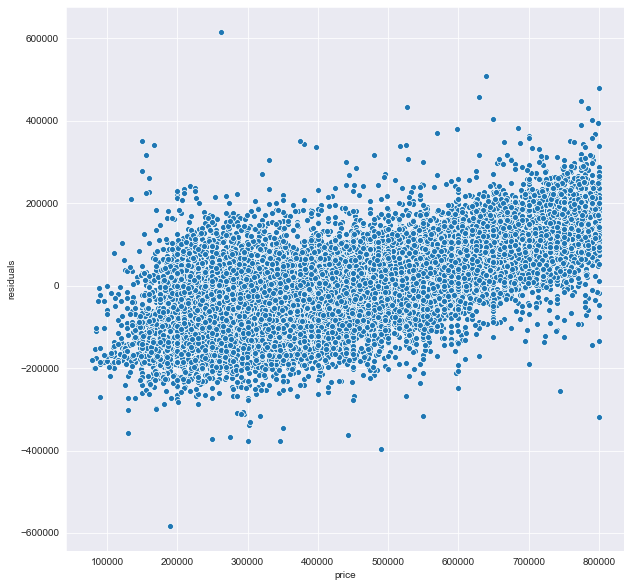

In [620]:
plt.figure(figsize= (10,10))

sns.scatterplot(y='residuals',x='price',data=resid)

In [621]:
X_shuff, y_shuff = shuffle(X, y)

In [622]:
X_shuff, y_shuff = shuffle(X, y)
cv_scores = cross_val_score(ols, X_shuff, y_shuff, scoring='r2', cv=5, n_jobs=-1) 
cv_scores.mean()

0.6291178542169309

In [623]:
X_shuff, y_shuff = shuffle(X, y)
cv_scores = cross_val_score(ols, X_shuff, y_shuff, scoring='r2', cv=5, n_jobs=-1) 
cv_scores.mean()

0.6286643539256425

In [624]:
X_shuff, y_shuff = shuffle(X, y)
cv_scores = cross_val_score(ols, X_shuff, y_shuff, scoring='r2', cv=5, n_jobs=-1) 
cv_scores.mean()

0.6288138389547498

In [625]:
ols = LinearRegression(fit_intercept=False,normalize=False)

In [626]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.955
Model:                            OLS   Adj. R-squared (uncentered):              0.955
Method:                 Least Squares   F-statistic:                          2.347e+04
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                        0.00
Time:                        14:47:36   Log-Likelihood:                     -2.1441e+05
No. Observations:               16601   AIC:                                  4.289e+05
Df Residuals:                   16586   BIC:                                  4.290e+05
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

In [627]:
df1 = df[x_cols]

In [628]:
df1['price']=df['price']

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [629]:
df1

,bedrooms,bathrooms,sqft_living,sqft_lot,distance_from_a_city,Years_last_renovation,basement,grade4,grade5,grade6,grade7,grade8,grade9,grade10,grade11,price
0,-0.403475,0.172728,0.528515,-0.191874,-0.277915,-0.622779,1,0,0,0,1,0,0,0,0,538000.0
1,-1.480435,-1.451543,-1.422609,-0.124304,-0.099467,1.379532,0,0,0,1,0,0,0,0,0,180000.0
2,0.673485,1.147291,-0.132699,-0.246801,-0.480101,0.274809,1,0,0,0,1,0,0,0,0,604000.0
3,-0.403475,-0.152126,-0.436207,-0.171343,-0.372100,-0.484689,0,0,0,0,0,1,0,0,0,510000.0
5,-0.403475,0.172728,-0.398269,-0.202237,1.802524,-0.760870,0,0,0,0,1,0,0,0,0,257500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19216,-0.403475,0.497582,-0.837272,-0.337596,-0.896996,-1.209664,1,0,0,0,0,1,0,0,0,475000.0
19217,-0.403475,0.497582,-0.598801,-0.341590,-0.524751,-1.244186,0,0,0,0,0,1,0,0,0,360000.0
19218,0.673485,0.497582,0.246686,-0.226883,-0.441410,-1.416799,0,0,0,0,0,1,0,0,0,400000.0
19219,-1.480435,-1.776397,-1.151620,-0.336224,-1.241090,-1.244186,0,0,0,0,1,0,0,0,0,402101.0


In [630]:
ols.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [631]:
df1.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'distance_from_a_city', 'Years_last_renovation', 'basement', 'grade4',
       'grade5', 'grade6', 'grade7', 'grade8', 'grade9', 'grade10', 'grade11',
       'price'],
      dtype='object')

In [632]:
# def condition_data(x_sample):
#     for feat in x_sample.columns
#     x_sample['feat'] = norm_feat
#     return x_sample

def predict_price(x_sample):
    cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'distance_from_a_city', 'Years_last_renovation', 'basement', 'grade4',
       'grade5', 'grade6', 'grade7', 'grade8', 'grade9', 'grade10', 'grade11']
    target = 'price'
    x_sample_final = x_sample[cols]
    return ols.predict(x_sample_final)[0]

In [633]:
x_sample = df1.sample(n=1)
x_sample.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'distance_from_a_city', 'Years_last_renovation', 'basement', 'grade4',
       'grade5', 'grade6', 'grade7', 'grade8', 'grade9', 'grade10', 'grade11',
       'price'],
      dtype='object')

In [634]:
x_sample

,bedrooms,bathrooms,sqft_living,sqft_lot,distance_from_a_city,Years_last_renovation,basement,grade4,grade5,grade6,grade7,grade8,grade9,grade10,grade11,price
3588,-0.403475,0.172728,-0.555443,-0.163258,3.395763,-0.622779,1,0,0,0,1,0,0,0,0,252000.0


In [635]:
predict_price(x_sample)

102343.55495806335